### 2. Vizualizace dat

#### Zadání:
V jednom ze cvičení jste probírali práci s moduly pro vizualizaci dat. Mezi nejznámější moduly patří matplotlib (a jeho nadstavby jako seaborn), pillow, opencv, aj. Vyberte si nějakou zajímavou datovou sadu na webovém portále Kaggle a proveďte datovou analýzu datové sady. Využijte k tomu různé typy grafů a interpretujte je (minimálně alespoň 5 zajímavých grafů). Příklad interpretace: z datové sady pro počasí vyplynulo z liniového grafu, že v létě je vyšší rozptyl mezi minimální a maximální hodnotou teploty. Z jiného grafu vyplývá, že v létě je vyšší průměrná vlhkost vzduchu. Důvodem vyššího rozptylu může být absorpce záření vzduchem, který má v létě vyšší tepelnou kapacitu.

#### Vypracované řešení
1. Poměr výskytu seriálů a filmů na platformě Netflix
2. 10 nejvíce produkujících zemí na platformě Netflix
3. Počet filmů, vydaných v daném roce, na platformě Netflix
4. Režiséři s největším počtem titulů na platformě Netflix
5. Herci vyskytující se v největším počtu titulů na platformě Netflix
6. 50 filmů na platformě Netflix začínajících na písmeno 'A' vydaných mezi lety 2000-2020 (včetně)
7. 50 seriálů na platformě Netflix začínajících na písmeno 'A' vydaných mezi lety 2000-2020 (včetně)

In [3]:
# https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [4]:
data = pd.read_csv("netflix_titles.csv", encoding="latin1")

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
data = data.filter(regex="^(?!Unnamed).*$", axis=1)

In [7]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
data.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [9]:
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


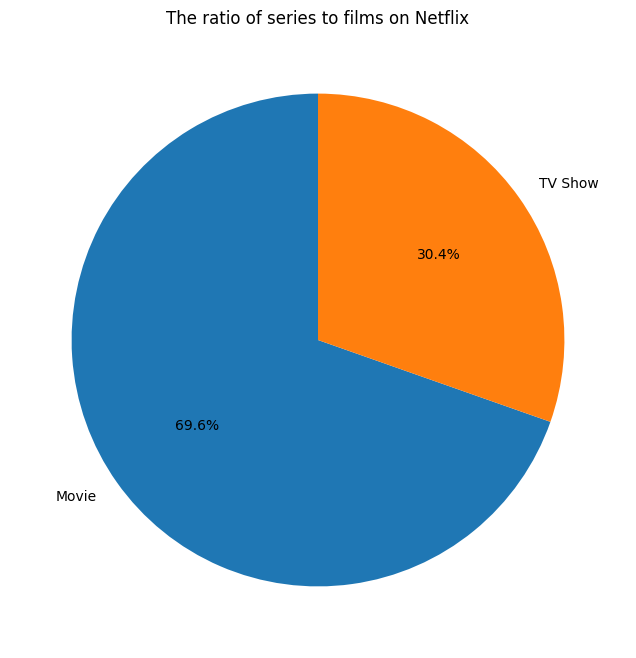

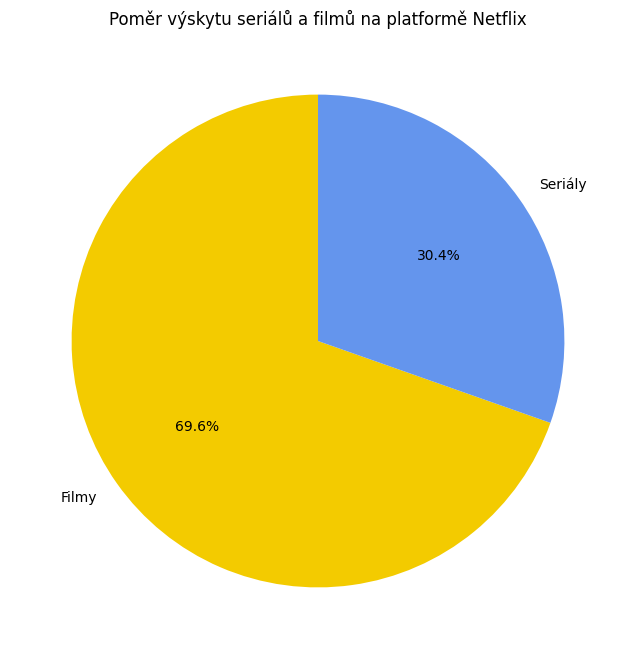

In [10]:
content_type_counts = data["type"].value_counts()

# Přeložené anglické popisky
custom_labels_czech = [
    "Filmy",
    "Seriály",
]

# Originální graf
plt.figure(figsize=(14, 8))
plt.pie(
    content_type_counts,
    labels=content_type_counts.index,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("The ratio of series to films on Netflix")
plt.show()

# Graf přeložený do češtiny
plt.figure(figsize=(14, 8))
plt.pie(
    content_type_counts,
    labels=custom_labels_czech,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#F3CB00", "#6495ED"],
)
plt.title("Poměr výskytu seriálů a filmů na platformě Netflix")
plt.show()

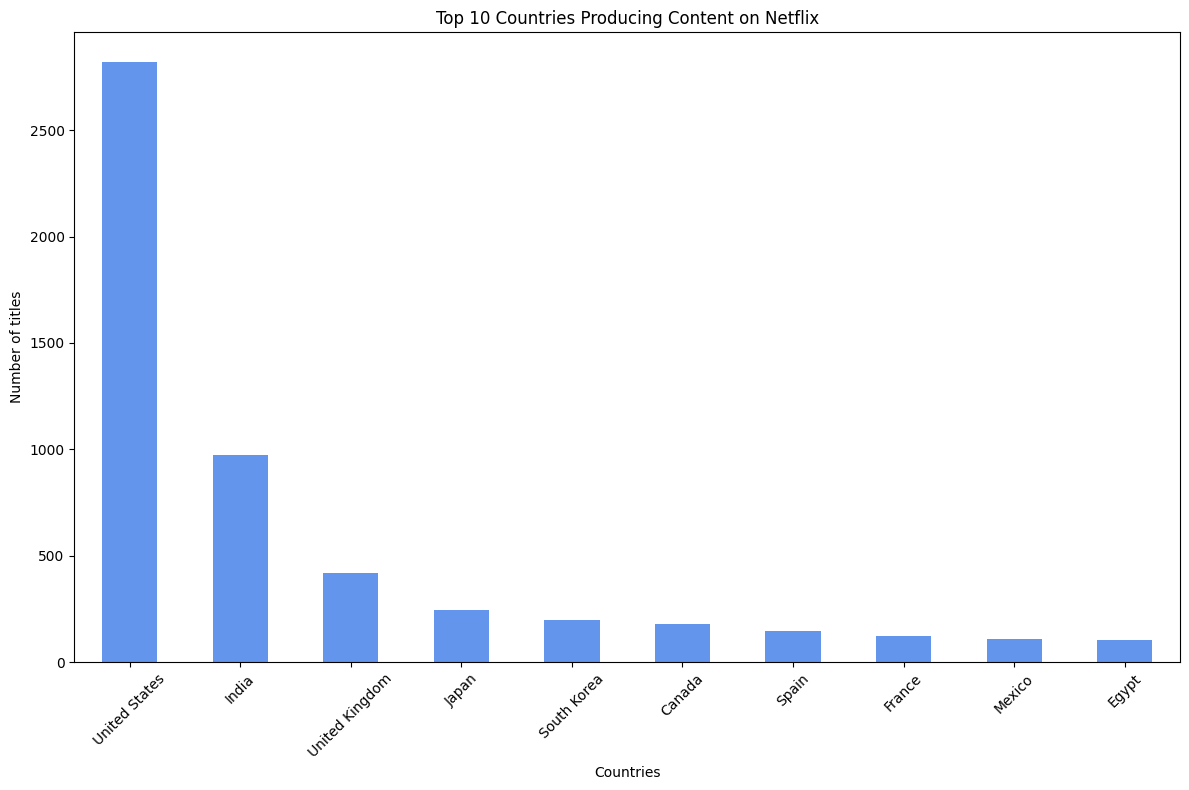

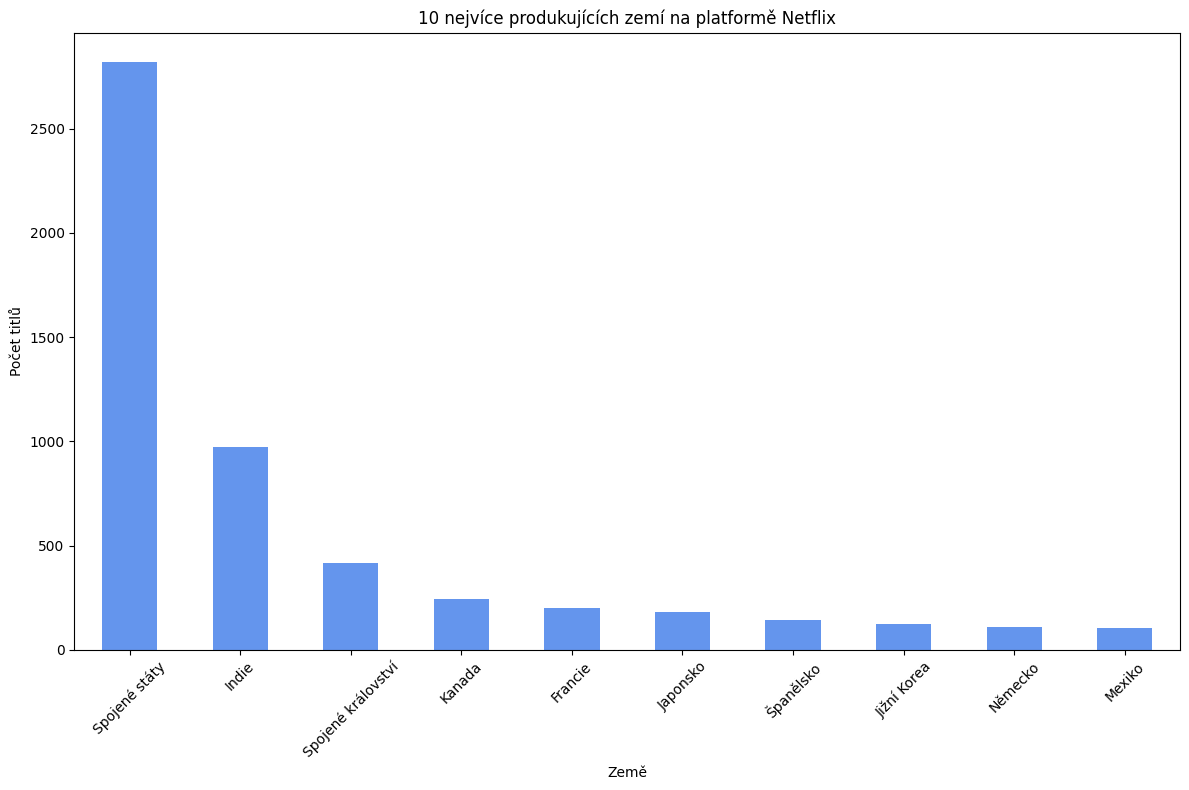

In [11]:
top_countries = data["country"].value_counts().head(10)

# Přeložené anglické popisky
custom_labels_czech = [
    "Spojené státy",
    "Indie",
    "Spojené království",
    "Kanada",
    "Francie",
    "Japonsko",
    "Španělsko",
    "Jižní Korea",
    "Německo",
    "Mexiko",
]

# Originální graf s anglickými popiskami
plt.figure(figsize=(12, 8))
top_countries.plot(kind="bar", color="#6495ED")
plt.title("Top 10 Countries Producing Content on Netflix")
plt.xlabel("Countries")
plt.ylabel("Number of titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graf přeložený do češtiny
plt.figure(figsize=(12, 8))
top_countries.plot(kind="bar", color="#6495ED")
plt.title("10 nejvíce produkujících zemí na platformě Netflix")
plt.xlabel("Země")
plt.ylabel("Počet titlů")
plt.xticks(range(len(custom_labels_czech)), custom_labels_czech, rotation=45)
plt.tight_layout()
plt.show()

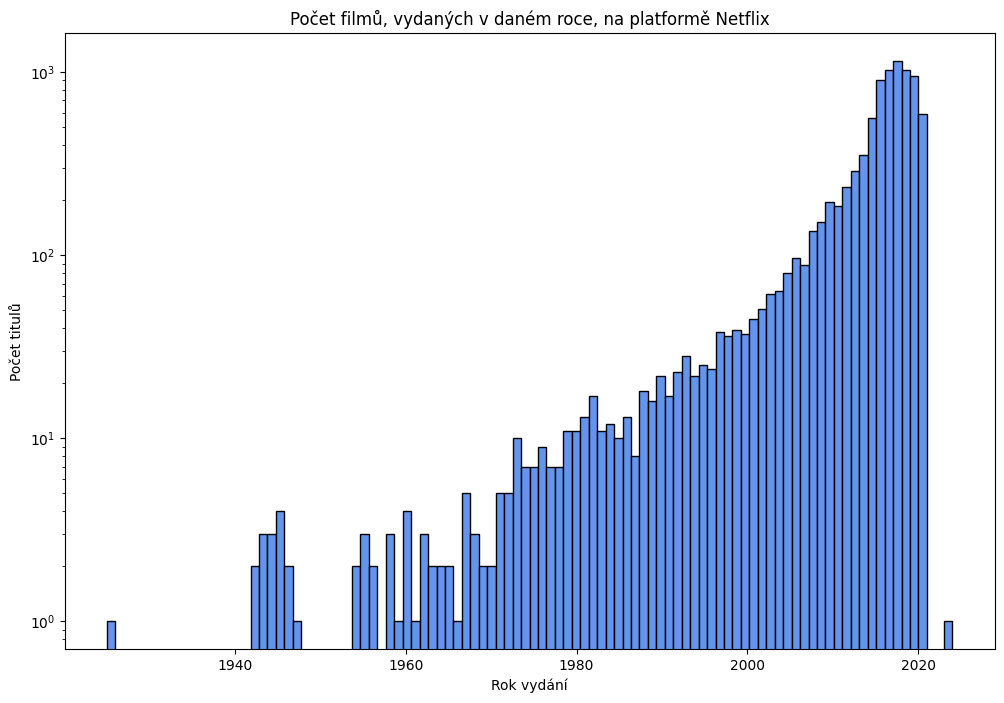

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(data["release_year"], bins=100, color="#6495ED", edgecolor="black")
plt.title("Počet filmů, vydaných v daném roce, na platformě Netflix")
plt.xlabel("Rok vydání")
plt.ylabel("Počet titulů")
plt.yscale("log")
plt.show()

In [13]:
# 10 seriálů s nejvíce sériemi
tv_shows = data[data["type"] == "TV Show"]
tv_shows_sorted = tv_shows.sort_values(by="duration", ascending=False)
top_5_tv_shows = tv_shows_sorted.head(10)
print(top_5_tv_shows[["title", "duration"]])

                              title   duration
1480                     Still Game  9 Seasons
3541                         Naruto  9 Seasons
5803                 Forensic Files  9 Seasons
1998               Call the Midwife  9 Seasons
8     The Great British Baking Show  9 Seasons
6504       Club Friday The Series 6  9 Seasons
1701          American Horror Story  9 Seasons
8442              The Office (U.S.)  9 Seasons
67                Saved by the Bell  9 Seasons
6603                         Dexter  8 Seasons


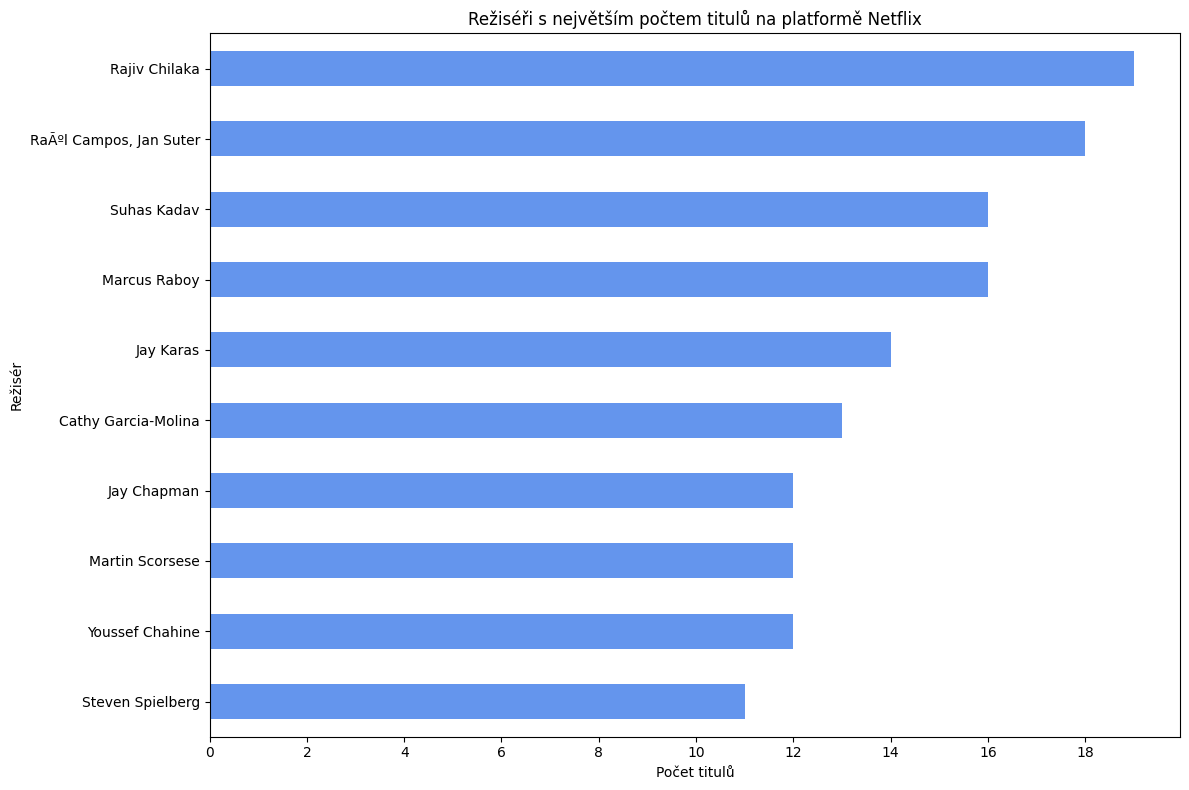

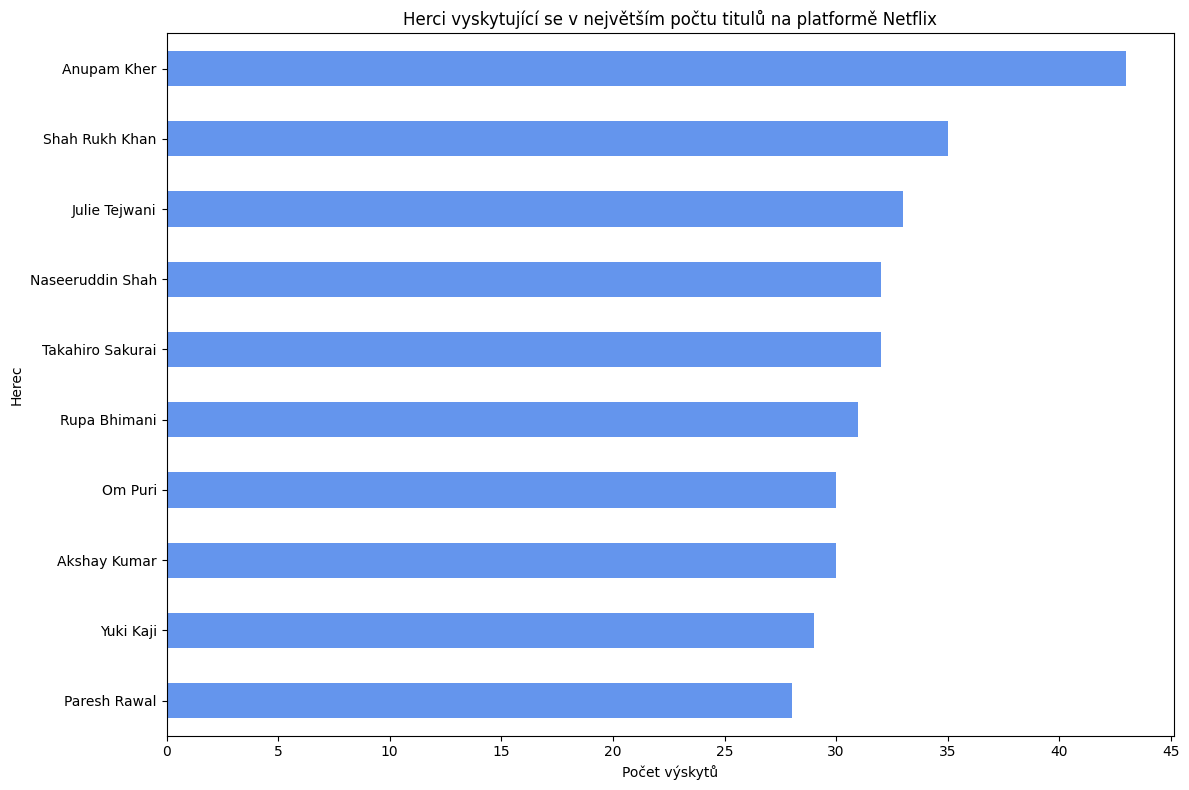

In [14]:
directors = data["director"].value_counts().head(10)
cast = data["cast"].str.split(", ", expand=True).stack().value_counts().head(10)

plt.figure(figsize=(12, 8))
directors.sort_values().plot(kind="barh", color="#6495ED").xaxis.set_major_locator(
    MaxNLocator(integer=True)
)
plt.title("Režiséři s největším počtem titulů na platformě Netflix")
plt.xlabel("Počet titulů")
plt.ylabel("Režisér")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
cast.sort_values().plot(kind="barh", color="#6495ED").xaxis.set_major_locator(
    MaxNLocator(integer=True)
)
plt.title("Herci vyskytující se v největším počtu titulů na platformě Netflix")
plt.xlabel("Počet výskytů")
plt.ylabel("Herec")
plt.tight_layout()
plt.show()

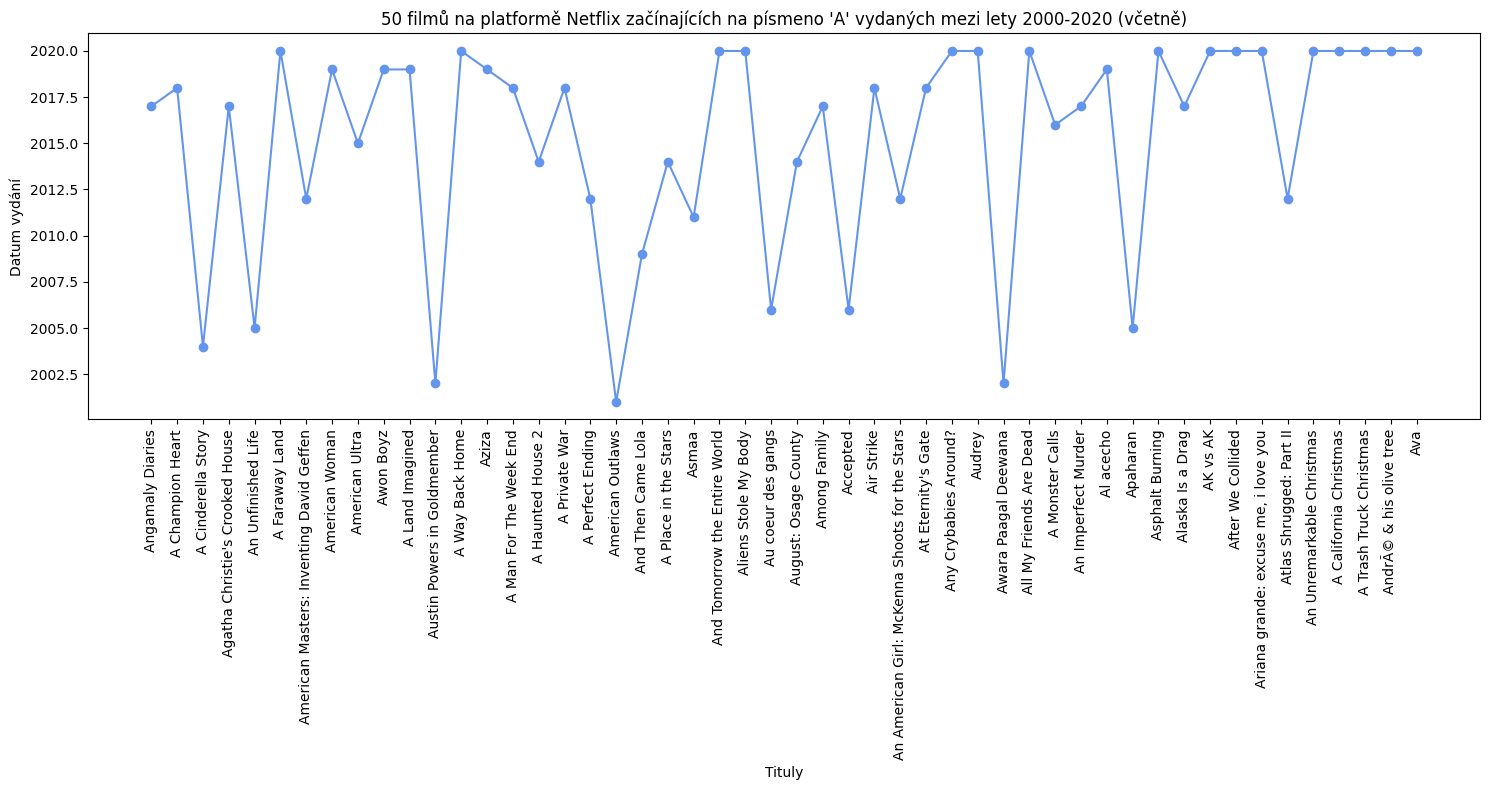

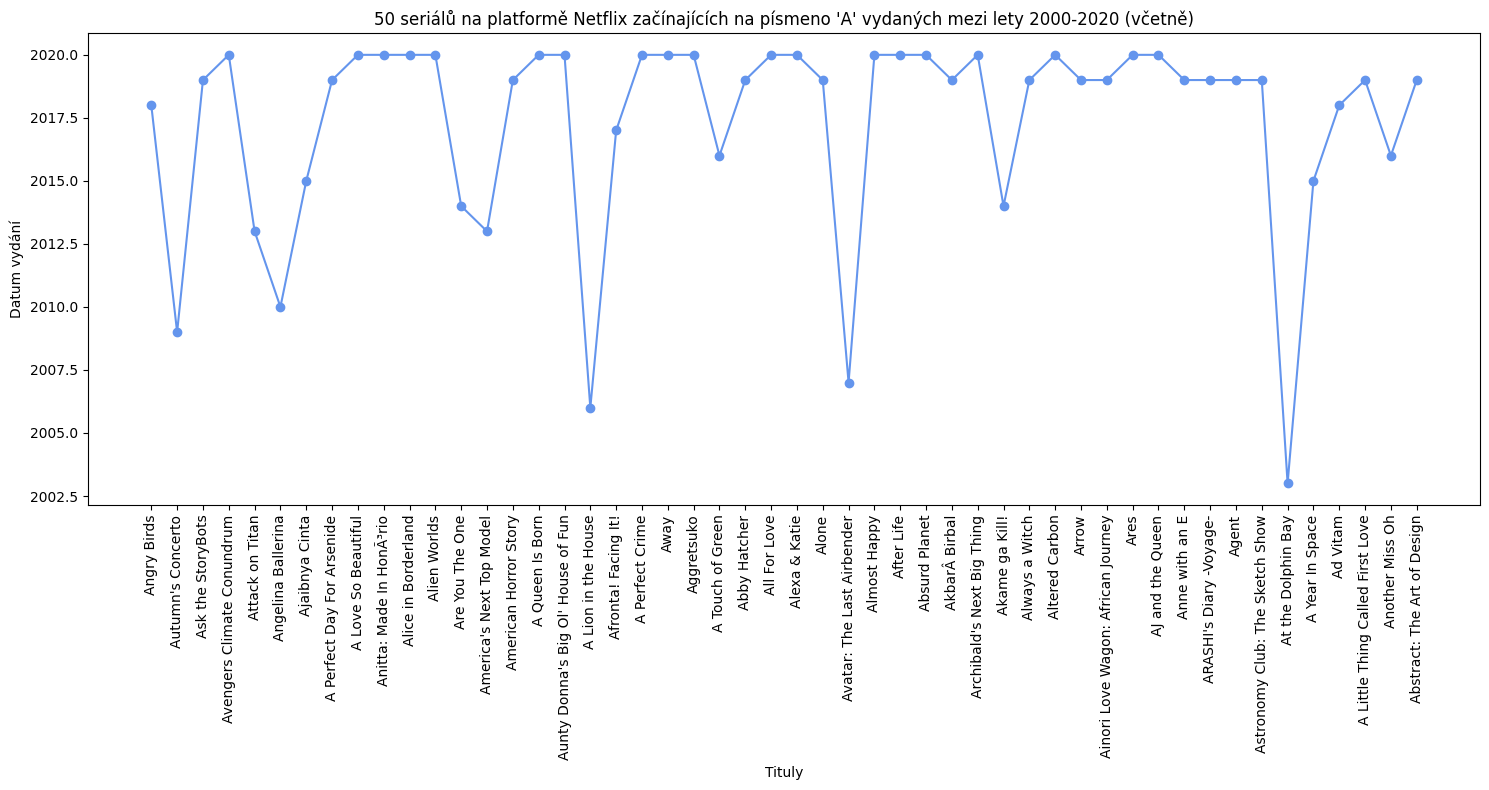

In [15]:
movies = data[
    (data["title"].str.startswith("A"))
    & (data["type"] == "Movie")
    & (data["release_year"] >= 2000)
    & (data["release_year"] <= 2020)
]

tv_shows = data[
    (data["title"].str.startswith("A"))
    & (data["type"] == "TV Show")
    & (data["release_year"] >= 2000)
    & (data["release_year"] <= 2020)
]

n_movies = 50
n_tv_shows = 50

plt.figure(figsize=(15, 8))
plt.plot(
    movies["title"][:n_movies],
    movies["release_year"][:n_movies],
    marker="o",
    linestyle="-",
    color="#6495ED",
)
plt.title(
    "50 filmů na platformě Netflix začínajících na písmeno 'A' vydaných mezi lety 2000-2020 (včetně)"
)
plt.xlabel("Tituly")
plt.ylabel("Datum vydání")
plt.xticks(range(n_movies), movies["title"][:n_movies], rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(
    tv_shows["title"][:n_tv_shows],
    tv_shows["release_year"][:n_tv_shows],
    marker="o",
    linestyle="-",
    color="#6495ED",
)
plt.title(
    "50 seriálů na platformě Netflix začínajících na písmeno 'A' vydaných mezi lety 2000-2020 (včetně)"
)
plt.xlabel("Tituly")
plt.ylabel("Datum vydání")
plt.xticks(range(n_tv_shows), tv_shows["title"][:n_tv_shows], rotation=90)
plt.tight_layout()
plt.show()